In [1]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload

from models import climate
reload(climate)

<module 'models.climate' from '/media/dwu402/Data/self-harm/models/climate.py'>

In [14]:
%matplotlib notebook

In [2]:
from scipy import integrate

parameters = [0.01, 0.9, 1.5, 3.5, 0.999, 0.6, 180]
def modelfn(t, y):
    return climate.model(t, y, parameters)

infected_fraction = 1e-5

solution = integrate.solve_ivp(modelfn, [1, 100], [1-infected_fraction, infected_fraction, 0, climate.Q0, 0], 
                               max_step=1/12)

In [3]:
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 7148
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  1.        ,   1.00075018,   1.00825203, ...,  99.91660384,
        99.99993717, 100.        ])
 t_events: None
        y: array([[9.99990000e-01, 9.99989565e-01, 9.99938916e-01, ...,
        5.77446783e-01, 5.83363318e-01, 5.83367533e-01],
       [1.00000000e-05, 1.00059647e-05, 1.00657921e-05, ...,
        1.59328364e-01, 1.59833395e-01, 1.59833831e-01],
       [0.00000000e+00, 4.29476023e-07, 5.10180626e-05, ...,
        2.63224853e-01, 2.56803287e-01, 2.56798636e-01],
       [1.04678319e-02, 1.04683690e-02, 1.04746126e-02, ...,
        1.05078426e-02, 1.04677877e-02, 1.04678319e-02],
       [0.00000000e+00, 1.35273840e-03, 1.48231208e-02, ...,
        1.76704627e+00, 1.76997827e+00, 1.76998040e+00]])

In [4]:
T = solution.t
S, I, R, Q, L = solution.y

Text(0.5, 1.0, 'Propotion of population as susceptible, infected and recovered')

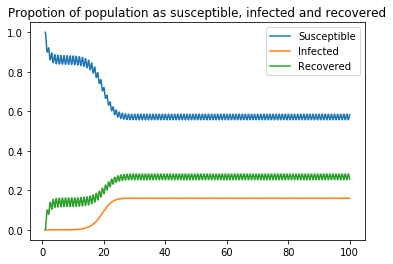

In [5]:
plt.plot(T, S, T, I, T, R)
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.title("Propotion of population as susceptible, infected and recovered")

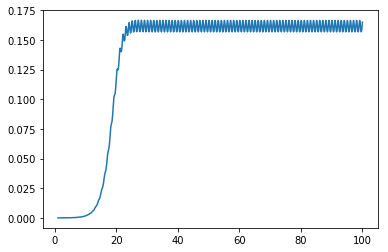

In [6]:
plt.plot(T, L*S*I)

<IPython.core.display.Javascript object>


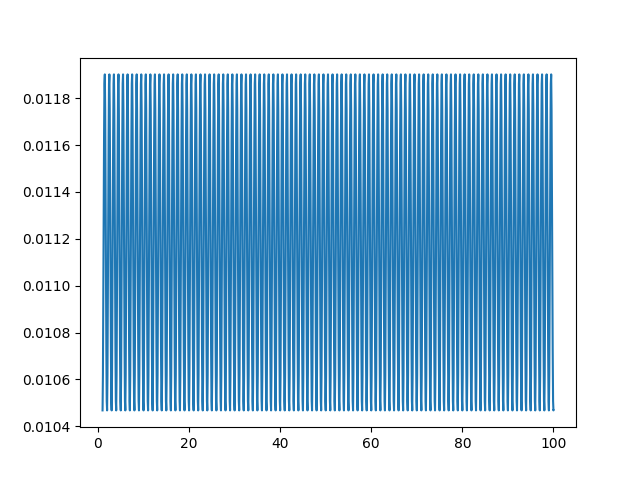

In [15]:
plt.plot(T, Q)

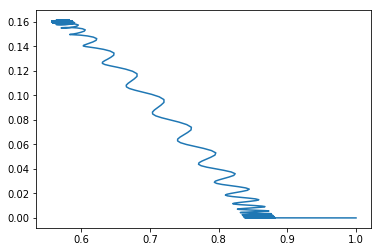

In [8]:
plt.plot(S, I)

<IPython.core.display.Javascript object>


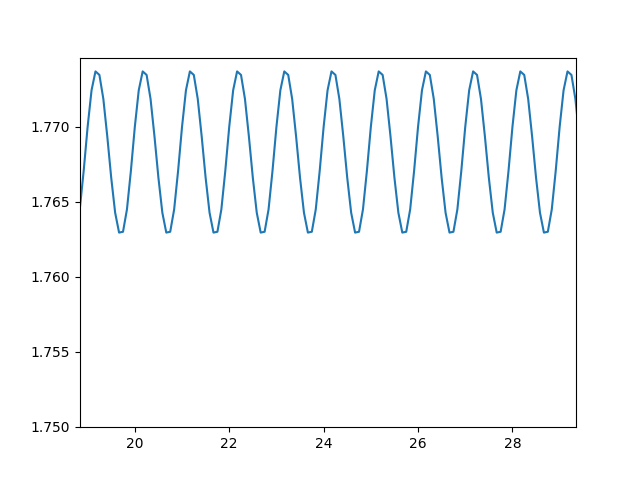

In [16]:
plt.plot(T, L)

In [9]:
print(climate.COEFS, climate.Q0)

[7.25530114e-04 1.41545857e+00 1.09246736e-02] 0.010467831915548051


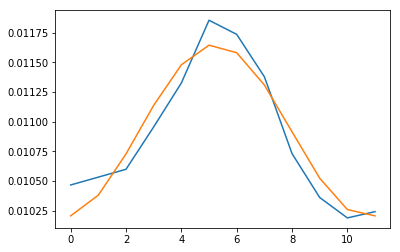

In [10]:
plt.plot(climate.HUMIDITY_DATA)
plt.plot(climate.HUMIDITY_FUNCTION(np.linspace(0,12,12), *climate.COEFS))